# Import Packages & Libraries

In [97]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports for data handling and requests
import pandas as pd
import requests

# Machine learning and preprocessing imports from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, make_scorer, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Set the theme for seaborn
sns.set_theme()


# Data Wrangling

In [98]:
# Use the earliest start date as per the API documentation
start_date = datetime.strptime('2018-10-11', '%Y-%m-%d')  # Earliest start date available
end_date = datetime.today()  # Today's date as end date
stablecoins = ["USDT", "TUSD", "USDC", "PAX", "DAI", "GUSD", "USDS"]

base_url = "https://stablecoinstats.com/api/range"

data_list = []

# Function to split the date range into intervals of up to 29 days
def date_range(start, end, delta):
    current = start
    while current < end:
        yield current, min(current + delta, end)
        current += delta + timedelta(days=1)

# Iterate over each coin
for coin in stablecoins:
    # Break the date range into intervals of up to 29 days
    for start, stop in date_range(start_date, end_date, timedelta(days=29)):
        start_str = start.strftime('%Y-%m-%d')
        stop_str = stop.strftime('%Y-%m-%d')
        url = f"{base_url}/{start_str}/{stop_str}/{coin}"
        
        try:
            response = requests.get(url)
            response.raise_for_status()  # Ensure we got a '200 OK' response
            
            data = response.json()
            
            # Handle the data according to your needs
            if 'error' not in data:
                # Assuming data is structured with dates as keys and details as values
                for date, details in data.items():
                    if isinstance(details, dict):
                        for symbol, detail in details.items():
                            detail['date'] = date
                            detail['symbol'] = symbol
                            data_list.append(detail)
            else:
                print(f"API error for {coin} from {start_str} to {stop_str}: {data['error']}")
                
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for {coin}: {e}")

# Convert the list to a DataFrame
data_df = pd.DataFrame(data_list)

# Note: You might need to adjust how you process and store the data based on the actual structure of the API response.


API error for USDT from 2024-03-13 to 2024-03-23: USDT is not available on date 2024-03-23 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for TUSD from 2024-03-13 to 2024-03-23: TUSD is not available on date 2024-03-23 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for USDC from 2018-10-11 to 2018-11-09: USDC is not available on date 2018-10-11 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for USDC from 2024-03-13 to 2024-03-23: USDC is not available on date 2024-03-23 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for PAX from 2021-09-25 to 2021-10-24: PAX is not available on date 2021-10-02 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for PAX from 2021-10-25 to 2021-11-23: PAX is not available on date 2021-10-25 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for PAX from 2021-11-24 to 2021-12-23: PAX is not available on date 2021-11-24 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for PAX from 2021-12-24

API error for USDS from 2023-11-14 to 2023-12-13: USDS is not available on date 2023-11-14 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for USDS from 2023-12-14 to 2024-01-12: USDS is not available on date 2023-12-14 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for USDS from 2024-01-13 to 2024-02-11: USDS is not available on date 2024-01-13 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for USDS from 2024-02-12 to 2024-03-12: USDS is not available on date 2024-02-12 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)
API error for USDS from 2024-03-13 to 2024-03-23: USDS is not available on date 2024-03-13 (syntax: /api/range/YYYY-MM-DD/YYYY-MM-DD/USDT)


In [114]:
df = pd.read_csv("stable_full2.csv", index_col=0)

In [115]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named `df`

# Step 1: Handling NaN values. For the sake of example, let's fill NaNs with 0.
df.fillna(0, inplace=True)

# Step 2: Extracting nested data from the 'blockchain' column.
# We will extract 'active_addresses' and 'tx_count' as examples.
df['active_addresses'] = df['blockchain'].apply(lambda x: x['active_addresses'] if isinstance(x, dict) else 0)
df['tx_count'] = df['blockchain'].apply(lambda x: x['tx_count'] if isinstance(x, dict) else 0)

# Assuming 'treasury' column is similar to 'blockchain' in structure,
# you would extract nested data in a similar manner.

# Step 3: Converting date strings to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Step 4: Ensure numerical data is in the correct format
numerical_columns = ['circulation', 'erc20_total_tokens', 'erc20_treasury_balance', 'omni_total_tokens', 
                     'omni_treasury_balance', 'quarantined_balance', 'price', 'price_percent_change_24h', 
                     'volume', 'circulation_change_24h', 'circulation_percent_change_24h', 
                     'volume_change_24h', 'volume_percent_change_24h']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Optional: Drop the original 'blockchain' column if no longer needed
df.drop(columns=['blockchain'], inplace=True)

# Display the processed DataFrame
print(df.head())


    circulation  erc20_total_tokens  erc20_treasury_balance        name  \
0  2.737372e+09        6.010950e+07              25108983.0  Tether USD   
1  2.737372e+09        0.000000e+00                     0.0  Tether USD   
2  2.737372e+09        0.000000e+00                     0.0  Tether USD   
3  2.537372e+09        0.000000e+00                     0.0  Tether USD   
4  2.537372e+09        0.000000e+00                     0.0  Tether USD   

   omni_total_tokens  omni_treasury_balance  quarantined_balance symbol  \
0       3.020000e+09           2.866788e+08           30950010.0   USDT   
1       0.000000e+00           0.000000e+00                  0.0   USDT   
2       0.000000e+00           0.000000e+00                  0.0   USDT   
3       0.000000e+00           0.000000e+00                  0.0   USDT   
4       0.000000e+00           0.000000e+00                  0.0   USDT   

        date     price  price_percent_change_24h  \
0 2018-10-11  0.000000                  0.0000

In [116]:
df

,circulation,erc20_total_tokens,erc20_treasury_balance,name,omni_total_tokens,omni_treasury_balance,quarantined_balance,symbol,date,price,price_percent_change_24h,treasury,volume,circulation_change_24h,circulation_percent_change_24h,volume_change_24h,volume_percent_change_24h,remarks,active_addresses,tx_count
0,2.737372e+09,6.010950e+07,25108983.0,Tether USD,3.020000e+09,2.866788e+08,30950010.0,USDT,2018-10-11,0.000000,0.000000,0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
1,2.737372e+09,0.000000e+00,0.0,Tether USD,0.000000e+00,0.000000e+00,0.0,USDT,2018-10-12,0.994102,0.062611,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",2.962383e+09,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
2,2.737372e+09,0.000000e+00,0.0,Tether USD,0.000000e+00,0.000000e+00,0.0,USDT,2018-10-13,0.988046,-0.527660,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",3.688741e+08,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
3,2.537372e+09,0.000000e+00,0.0,Tether USD,0.000000e+00,0.000000e+00,0.0,USDT,2018-10-14,0.972332,0.021564,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",5.182188e+08,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
4,2.537372e+09,0.000000e+00,0.0,Tether USD,0.000000e+00,0.000000e+00,0.0,USDT,2018-10-15,0.955407,-0.921532,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",3.012224e+09,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,4.152346e+05,0.000000e+00,0.0,Stably USD,0.000000e+00,0.000000e+00,0.0,USDS,2022-07-17,1.000000,0.000000,0,2.417355e+06,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
12116,4.152346e+05,0.000000e+00,0.0,Stably USD,0.000000e+00,0.000000e+00,0.0,USDS,2022-07-18,1.000000,0.000000,0,2.417355e+06,0.0,0.0,4.656613e-10,1.926325e-14,0,0,0
12117,4.152346e+05,0.000000e+00,0.0,Stably USD,0.000000e+00,0.000000e+00,0.0,USDS,2022-07-19,1.000000,0.000000,0,2.417355e+06,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0
12118,4.152346e+05,0.000000e+00,0.0,Stably USD,0.000000e+00,0.000000e+00,0.0,USDS,2022-07-20,1.000000,0.000000,0,2.417355e+06,0.0,0.0,0.000000e+00,0.000000e+00,0,0,0


# Data Pre-processing

In [117]:
import pandas as pd
import numpy as np

# Sample DataFrame 'df' creation step would go here

# Function to fill with random values within ±2 standard deviations of the mean, for a specific group
def fill_numerical_within_std(group, col):
    # Calculate mean and standard deviation for the group
    mean, std = group[col].mean(), group[col].std()
    # If the column only contains 0s, mean and std would be 0, and filling with random values isn't needed
    if std > 0:
        # Replace 0 values with a random number within ±2 standard deviations of the mean
        group[col] = group[col].apply(lambda x: np.random.normal(loc=mean, scale=std) if x == 0 else x)
    return group

# Preprocess the DataFrame
def preprocess_df(df):
    # Define the columns to process numerically
    financial_columns = ['circulation', 'erc20_total_tokens', 'erc20_treasury_balance',
                         'omni_total_tokens', 'omni_treasury_balance', 'quarantined_balance', 'volume']
    
    # Process financial columns with custom logic
    for col in financial_columns:
        # Group by 'symbol' and apply random filling within ±2 standard deviations
        df = df.groupby('symbol', group_keys=False).apply(lambda group: fill_numerical_within_std(group, col))

    # Define and process percent change columns by filling 0s with the median of each column
    percent_change_columns = ['price_percent_change_24h', 'circulation_percent_change_24h',
                              'volume_percent_change_24h']
    for col in percent_change_columns:
        median_val = df[col].median()
        df[col] = df[col].replace(0, median_val)

    # Fill categorical/descriptive missing values or 0s with a placeholder
    df['remarks'] = df['remarks'].replace(0, 'No Remarks')

    return df

# Assuming 'df' is your DataFrame
df = preprocess_df(df)

# Display the first few rows of the preprocessed DataFrame to verify the changes
print(df.head())


    circulation  erc20_total_tokens  erc20_treasury_balance        name  \
0  2.737372e+09        6.010950e+07            2.510898e+07  Tether USD   
1  2.737372e+09        6.613367e+05           -3.551042e+05  Tether USD   
2  2.737372e+09        9.172511e+05           -4.161317e+05  Tether USD   
3  2.537372e+09        1.128049e+04           -7.789065e+04  Tether USD   
4  2.537372e+09        2.745410e+05           -1.267511e+06  Tether USD   

   omni_total_tokens  omni_treasury_balance  quarantined_balance symbol  \
0       3.020000e+09           2.866788e+08         3.095001e+07   USDT   
1      -1.241530e+08          -1.163965e+07         7.229064e+05   USDT   
2      -6.724998e+07          -4.138081e+06         4.646597e+05   USDT   
3      -3.233306e+07          -6.673767e+06         7.884941e+04   USDT   
4       4.135193e+07          -1.433498e+06         2.390243e+05   USDT   

        date     price  price_percent_change_24h  \
0 2018-10-11  0.000000                 -0.0025

In [118]:
df 

,circulation,erc20_total_tokens,erc20_treasury_balance,name,omni_total_tokens,omni_treasury_balance,quarantined_balance,symbol,date,price,price_percent_change_24h,treasury,volume,circulation_change_24h,circulation_percent_change_24h,volume_change_24h,volume_percent_change_24h,remarks,active_addresses,tx_count
0,2.737372e+09,6.010950e+07,2.510898e+07,Tether USD,3.020000e+09,2.866788e+08,3.095001e+07,USDT,2018-10-11,0.000000,-0.002540,0,9.072634e+09,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
1,2.737372e+09,6.613367e+05,-3.551042e+05,Tether USD,-1.241530e+08,-1.163965e+07,7.229064e+05,USDT,2018-10-12,0.994102,0.062611,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",2.962383e+09,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
2,2.737372e+09,9.172511e+05,-4.161317e+05,Tether USD,-6.724998e+07,-4.138081e+06,4.646597e+05,USDT,2018-10-13,0.988046,-0.527660,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",3.688741e+08,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
3,2.537372e+09,1.128049e+04,-7.789065e+04,Tether USD,-3.233306e+07,-6.673767e+06,7.884941e+04,USDT,2018-10-14,0.972332,0.021564,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",5.182188e+08,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
4,2.537372e+09,2.745410e+05,-1.267511e+06,Tether USD,4.135193e+07,-1.433498e+06,2.390243e+05,USDT,2018-10-15,0.955407,-0.921532,"{'erc20_balance': 25108983.0, 'erc20_supply': ...",3.012224e+09,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,4.152346e+05,0.000000e+00,0.000000e+00,Stably USD,0.000000e+00,0.000000e+00,0.000000e+00,USDS,2022-07-17,1.000000,-0.002540,0,2.417355e+06,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
12116,4.152346e+05,0.000000e+00,0.000000e+00,Stably USD,0.000000e+00,0.000000e+00,0.000000e+00,USDS,2022-07-18,1.000000,-0.002540,0,2.417355e+06,0.0,0.0,4.656613e-10,1.926325e-14,No Remarks,0,0
12117,4.152346e+05,0.000000e+00,0.000000e+00,Stably USD,0.000000e+00,0.000000e+00,0.000000e+00,USDS,2022-07-19,1.000000,-0.002540,0,2.417355e+06,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0
12118,4.152346e+05,0.000000e+00,0.000000e+00,Stably USD,0.000000e+00,0.000000e+00,0.000000e+00,USDS,2022-07-20,1.000000,-0.002540,0,2.417355e+06,0.0,0.0,0.000000e+00,0.000000e+00,No Remarks,0,0


# Feature Engineering

In [119]:
dict_df = pd.json_normalize(df['treasury'])
df = pd.concat([df.drop(columns=['treasury']), dict_df], axis=1)

In [120]:
# Ensure 'price' and 'volume' are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

# Group by 'symbol' and then apply rolling window calculations
# This ensures calculations are done per stablecoin

# Moving Averages for price, grouped by symbol
df['price_ma7'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=7).mean())
df['price_ma30'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=30).mean())

# Moving Averages for volume, grouped by symbol
df['volume_ma7'] = df.groupby('symbol')['volume'].transform(lambda x: x.rolling(window=7).mean())
df['volume_ma30'] = df.groupby('symbol')['volume'].transform(lambda x: x.rolling(window=30).mean())

# Volatility Indices: Price standard deviation over the dataset (simplified example), grouped by symbol
df['price_std'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).std())

# Example of handling missing values by forward filling (use cautiously)
# It's applied globally here, but you might want to consider handling missing values within each group separately
df.fillna(method='ffill', inplace=True)

# Normalization (Min-Max scaling)
scaler = MinMaxScaler()
# If you need to scale within each group, you'll have to apply the scaler within a groupby operation
df[['circulation', 'volume']] = scaler.fit_transform(df[['circulation', 'volume']])



0       2018-10-11
1       2018-10-12
2       2018-10-13
3       2018-10-14
4       2018-10-15
           ...    
12115   2022-07-17
12116   2022-07-18
12117   2022-07-19
12118   2022-07-20
12119   2022-07-21
Name: date, Length: 12120, dtype: datetime64[ns]

# Exploratory Data Analysis

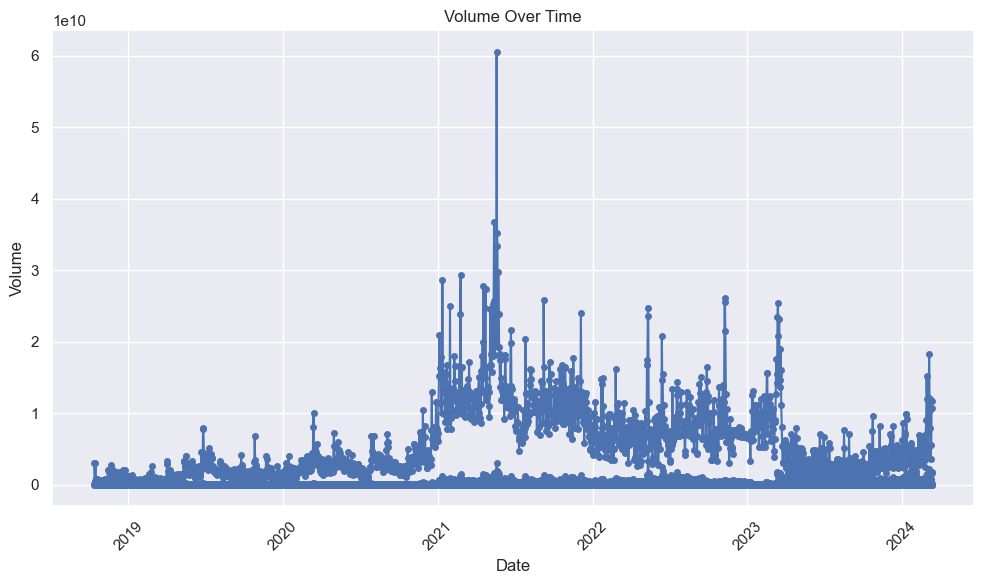

In [123]:
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it's already preprocessed
# Also assuming 'volume' is a column in your DataFrame representing some numerical data over time

# Convert 'date' column to datetime if not already done
df['date'] = pd.to_datetime(df['date'])


# Plotting 'volume' over time
plt.figure(figsize=(10, 6))
plt.plot(df.date, data_df['volume'], marker='o', linestyle='-', markersize=4)
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

# Show plot
plt.show()


In [124]:
# Assuming 'df' is your DataFrame

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                                circulation  erc20_total_tokens  \
circulation                        1.000000           -0.002468   
erc20_total_tokens                -0.002468            1.000000   
erc20_treasury_balance             0.021739            0.505937   
omni_total_tokens                 -0.003978            0.520162   
omni_treasury_balance              0.014276            0.486399   
quarantined_balance                0.015286            0.510190   
price                             -0.074423           -0.020491   
price_percent_change_24h          -0.009484           -0.001147   
volume                             0.664025            0.011591   
circulation_change_24h             0.144561            0.002470   
circulation_percent_change_24h    -0.016105            0.000099   
volume_change_24h                 -0.000074            0.013336   
volume_percent_change_24h         -0.004528           -0.000053   
active_addresses                        NaN                 Na

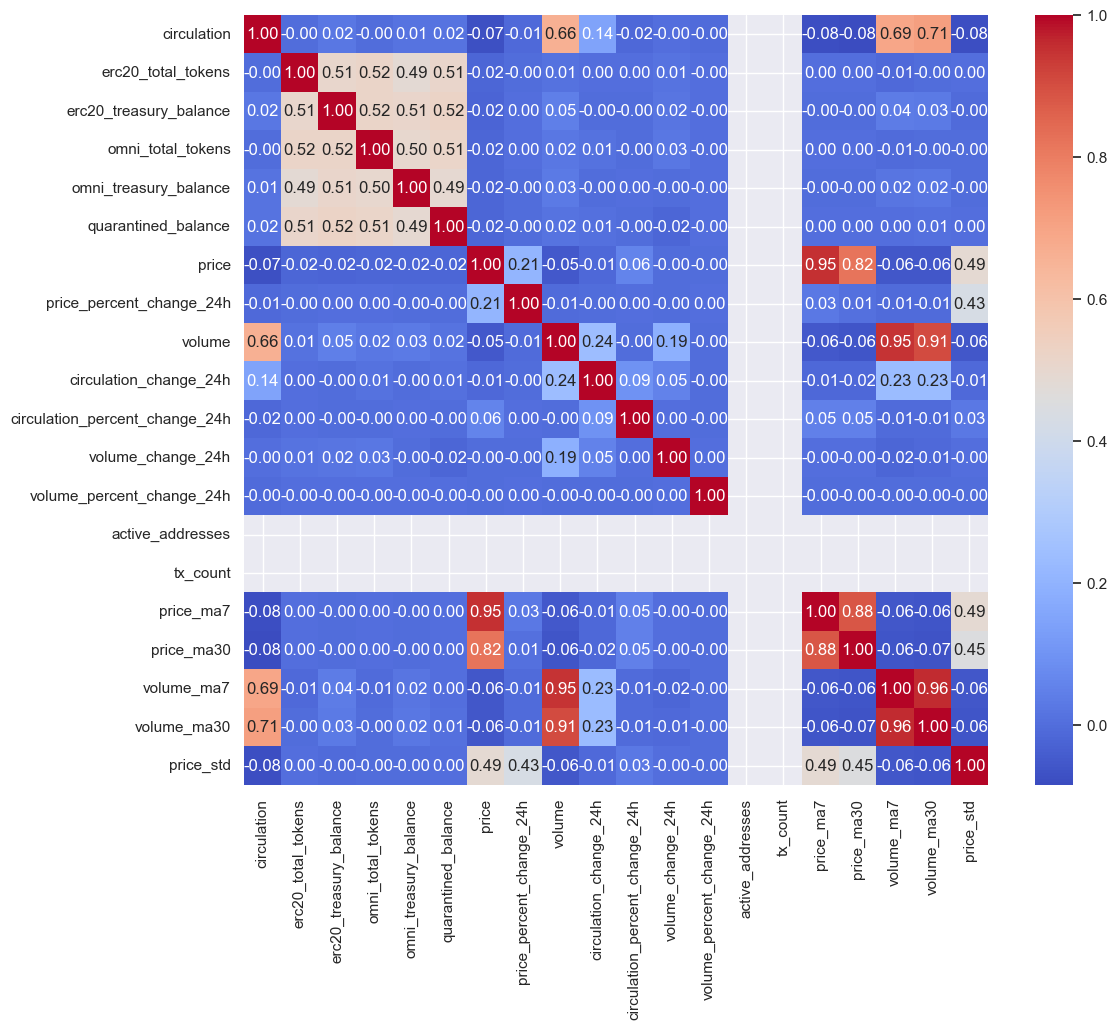

In [125]:
# Assuming 'correlation_matrix' is your computed correlation matrix
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()


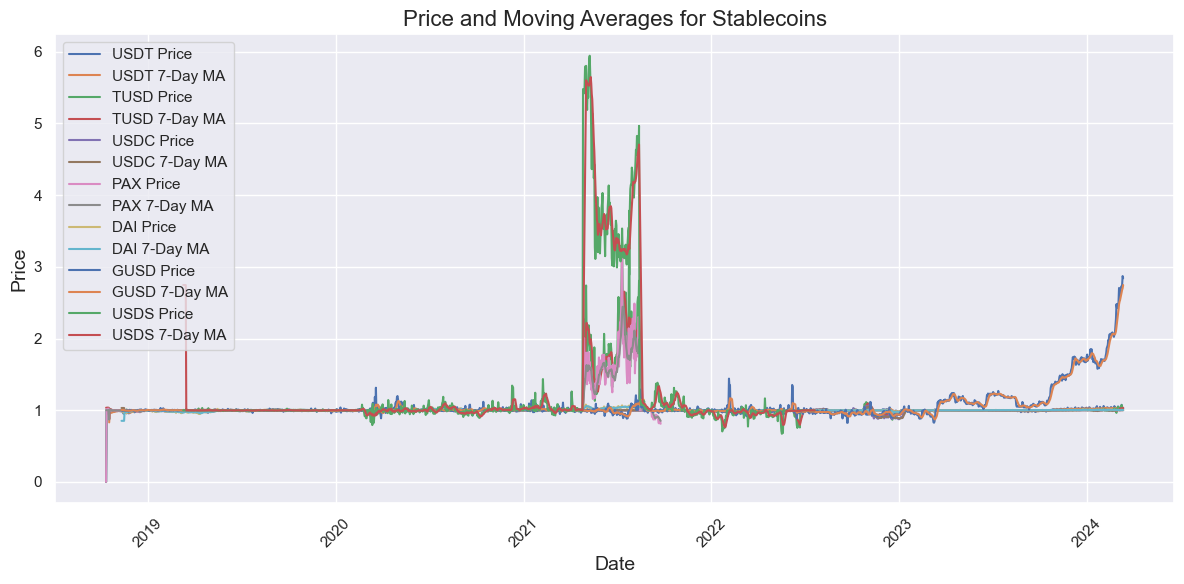

In [133]:
# Plotting with seaborn
plt.figure(figsize=(12, 6))

# Plotting each symbol with seaborn lineplot
for symbol in df['symbol'].unique():
    subset = df[df['symbol'] == symbol]
    sns.lineplot(x='date', y='price', data=subset, label=f"{symbol} Price")
    sns.lineplot(x='date', y='price_ma7', data=subset, label=f"{symbol} 7-Day MA")

plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Moving Averages for Stablecoins', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/0b/8w8fn7qx0g1dpgh3hfn8msr40000gn/T/ipykernel_13648/1114686870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


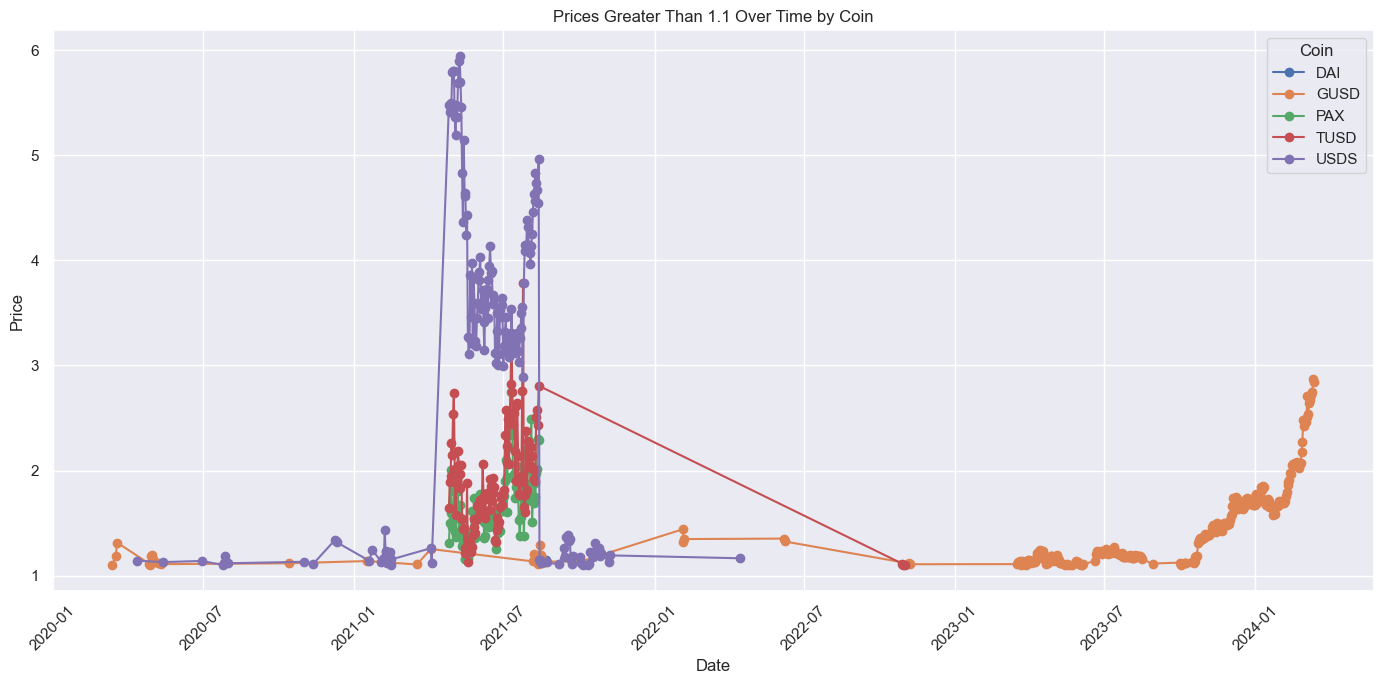

In [152]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Filter rows where 'price' is greater than 2
df_filtered = df[df["price"] > 1.1]

# Ensure 'date' is a datetime type for proper plotting
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Sorting values to ensure the dates are in order
df_filtered = df_filtered.sort_values(by='date')

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Group by 'symbol' and plot each group
for symbol, group in df_filtered.groupby('symbol'):
    ax.plot(group['date'], group['price'], marker='o', linestyle='-', label=symbol)

ax.set_title('Prices Greater Than 1.1 Over Time by Coin')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(title='Coin')

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()


/var/folders/0b/8w8fn7qx0g1dpgh3hfn8msr40000gn/T/ipykernel_13648/1505757568.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


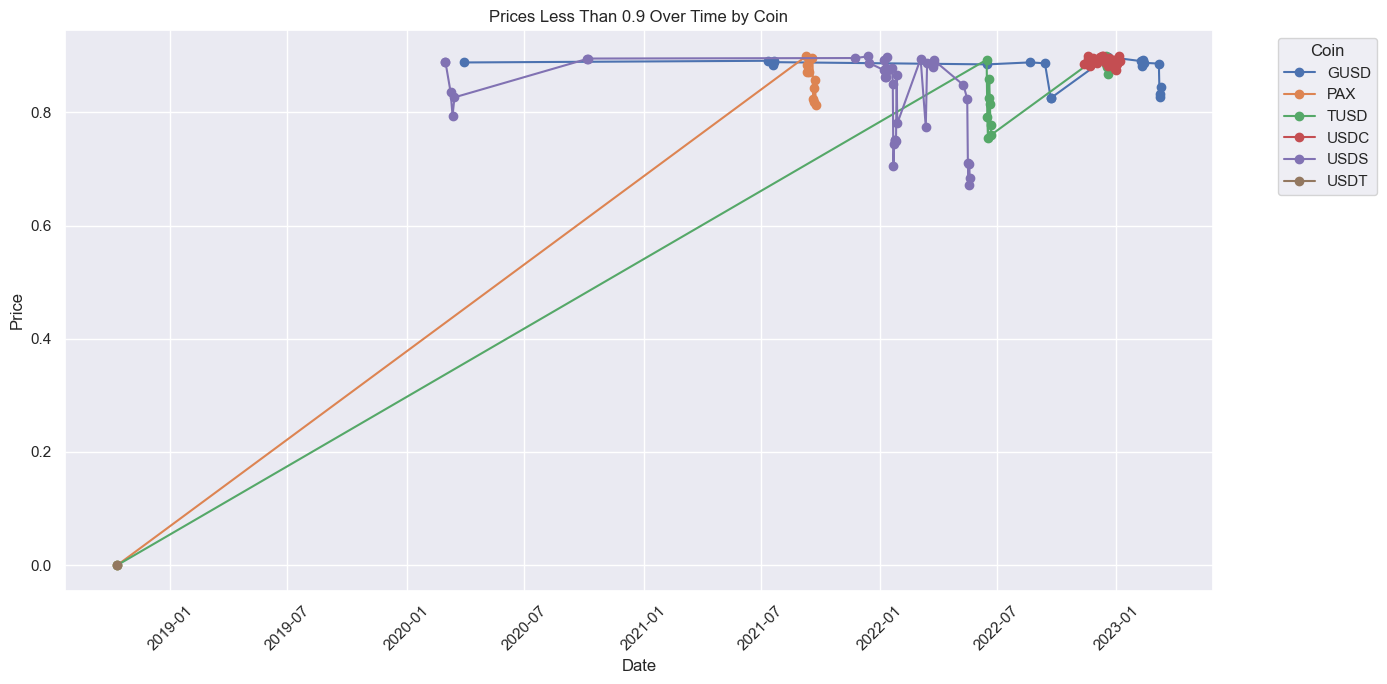

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Filter rows where 'price' is less than 0.9
df_filtered = df[df["price"] < 0.9]

# Ensure 'date' is a datetime type for proper plotting
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Sorting values to ensure the dates are in order
df_filtered = df_filtered.sort_values(by='date')

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Group by 'symbol' and plot each group
for symbol, group in df_filtered.groupby('symbol'):
    ax.plot(group['date'], group['price'], marker='o', linestyle='-', label=symbol)

ax.set_title('Prices Less Than 0.9 Over Time by Coin')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(title='Coin', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated date labels and legend
plt.show()


# OneClass SVM

In [128]:
df_enhanced = df
# Enhanced Data Preprocessing and Feature Engineering
# Note: For simplicity, we're directly using the new features without additional engineering in this example.
features = df_enhanced[['price', 'price_percent_change_24h', 'volume', 'volume_change_24h', 'volume_percent_change_24h']]
scaled_features = scaler.fit_transform(features)

# Model Initialization with Hyperparameter Tuning
# Note: Due to the demonstration nature, we're using predefined parameters.
model_enhanced = OneClassSVM(kernel="rbf", gamma='auto')
parameters = {'nu': [0.01, 0.05, 0.1]}

# Splitting data into training and testing sets for evaluation purposes
# Note: In a real-world scenario, especially for unsupervised tasks like anomaly detection, this step might differ.
X_train, X_test = train_test_split(scaled_features, test_size=0.3, random_state=42)

# Grid Search for parameter tuning (simulated here as we only use OneClassSVM without GridSearchCV due to its unsupervised nature)
model_enhanced.fit(X_train)

# Predicting anomalies on the test set
predictions_enhanced = model_enhanced.predict(X_test)
anomalies_enhanced = X_test[predictions_enhanced == -1]

anomalies_enhanced

array([[1.68225202e-01, 1.41486465e-01, 2.75352553e-04, 3.79381633e-01,
        4.10619882e-06],
       [1.68064458e-01, 1.41245902e-01, 3.06998066e-04, 3.79233187e-01,
        2.16440016e-06],
       [1.68151221e-01, 1.41361573e-01, 1.19010273e-04, 3.79222479e-01,
        1.63200722e-06],
       ...,
       [8.72857908e-01, 1.32611003e-01, 4.34250155e-05, 3.79285273e-01,
        2.55485030e-06],
       [1.91248603e-01, 1.56176508e-01, 2.23099404e-07, 3.79285104e-01,
        1.14101556e-06],
       [1.67946152e-01, 1.41225412e-01, 5.32356844e-02, 3.99484506e-01,
        4.32893064e-06]])

In [129]:
# Assuming 'price' is a feature in your dataset and scaled_features is derived from it
# Reverse scaling to get original price values for label simulation
original_prices = scaler.inverse_transform(X_test)[:, 0]  # Assuming 'price' is the first feature

# Generate true labels based on the price being within 1 ± 0.10
true_labels_test = np.where((original_prices >= 0.98) & (original_prices <= 1.02), 0, 1)

# The mapping of predictions remains the same
mapped_predictions_enhanced = np.where(predictions_enhanced == -1, 1, 0)

# Calculate and print the classification report
report = classification_report(true_labels_test, mapped_predictions_enhanced, target_names=['Normal', 'Anomaly'])
print(report)


              precision    recall  f1-score   support

      Normal       0.88      0.54      0.67      2942
     Anomaly       0.26      0.68      0.38       694

    accuracy                           0.57      3636
   macro avg       0.57      0.61      0.52      3636
weighted avg       0.76      0.57      0.62      3636



In [130]:
true_labels_test,  mapped_predictions_enhanced

(array([0, 0, 0, ..., 1, 1, 0]), array([0, 1, 0, ..., 1, 1, 1]))

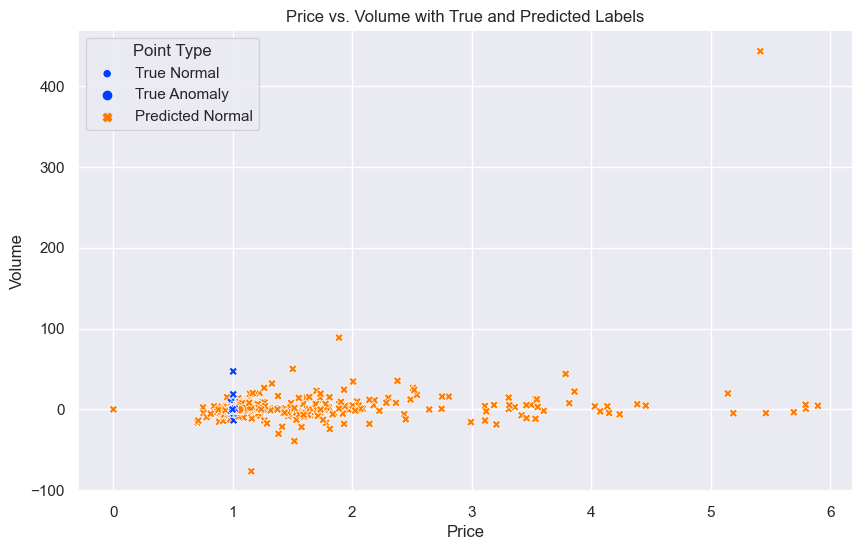

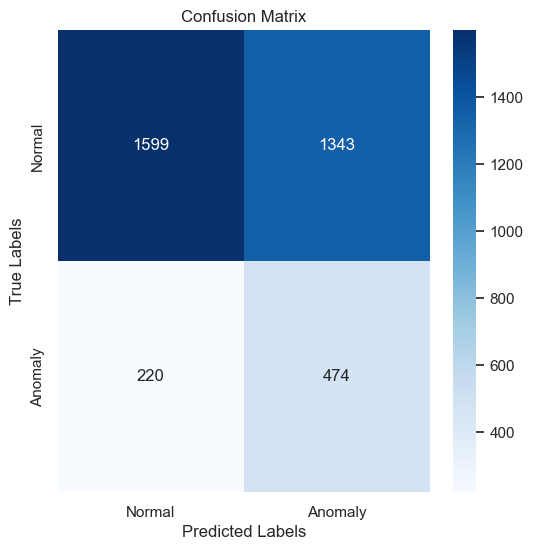

In [131]:
# Scatter Plot - Assuming 'price' and 'volume' are the first two features for visualization
# Reverse scaling for visualization purposes
original_features = scaler.inverse_transform(X_test)
original_prices = original_features[:, 0]  # Assuming 'price' is the first feature
original_volumes = original_features[:, 1]  # Assuming 'volume' is the second feature for demonstration

plt.figure(figsize=(10, 6))
sns.scatterplot(x=original_prices, y=original_volumes, hue=true_labels_test, style=mapped_predictions_enhanced, palette="bright")
plt.title('Price vs. Volume with True and Predicted Labels')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend(title='Point Type', labels=['True Normal', 'True Anomaly', 'Predicted Normal', 'Predicted Anomaly'])
plt.grid(True)
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(true_labels_test, mapped_predictions_enhanced)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Isolation Forest

In [134]:
# Assuming 'features' and 'df' are already defined and 'scaler' is fitted to your dataset
scaled_features = scaler.transform(features)
original_prices = scaler.inverse_transform(scaled_features)[:, 0]  # Adjust index if 'price' is not the first feature

# Simulate labels for the entire dataset based on your condition
y_simulated = np.where((original_prices >= 0.98) & (original_prices <= 1.02), 0, 1)

# Now, split your dataset into training and testing sets using the simulated labels
X_train, X_test, y_train_simulated, y_test_simulated = train_test_split(
    scaled_features, y_simulated, test_size=0.3, random_state=42
)

# Adjust the custom_scorer to work with the simulated labels
def custom_scorer(y_true, y_pred):
    y_pred = np.where(y_pred == -1, 0, 1)  # Flip labels because Isolation Forest uses -1 for anomalies which we map to 1
    return f1_score(y_true, y_pred)

# Initialize the model
iso_forest = IsolationForest(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring=make_scorer(custom_scorer, greater_is_better=True), cv=5)

# Note: Make sure the custom_scorer and GridSearchCV are set up to handle the 0s and 1s as normal and anomaly labels respectively
grid_search.fit(X_train, y_train_simulated)

# After finding the best parameters, evaluate on X_test and y_test_simulated
best_model = grid_search.best_estimator_
predictions_test = best_model.predict(X_test)
mapped_predictions_test = np.where(predictions_test == -1, 1, 0)  # Aligning with your labeling scheme



In [135]:
# Directly calculate confusion matrix components
cm = confusion_matrix(y_test_simulated, mapped_predictions_test)

if cm.shape == (1, 1):
    # Assuming the only class present in y_test_simulated is 0 (normal)
    tn = cm[0, 0]
    fp = 0  # No false positives if no anomalies were predicted
else:
    tn, fp, fn, tp = cm.ravel()

# Assuming anomalies are rare/absent in the test set and focusing on false positives
print(f"True Negatives (Correctly identified as Normal): {tn}")
print(f"False Positives (Normal instances incorrectly flagged as Anomalies): {fp}")

# Adjusted precision, recall calculation for cases with no true positives
precision = 0 if fp == 0 else 'Undefined'  # Precision is not defined when there are no positive predictions
recall = 'Not applicable'  # Recall is not applicable in this context as there are no true anomalies in the test set
f1 = 'Not applicable'  # F1 is not applicable without true positive predictions

print(f"Precision (of Anomaly detection): {precision}")
print(f"Recall (of Anomaly detection): {recall}")
print(f"F1 Score (of Anomaly detection): {f1}")


True Negatives (Correctly identified as Normal): 2920
False Positives (Normal instances incorrectly flagged as Anomalies): 22
Precision (of Anomaly detection): Undefined
Recall (of Anomaly detection): Not applicable
F1 Score (of Anomaly detection): Not applicable


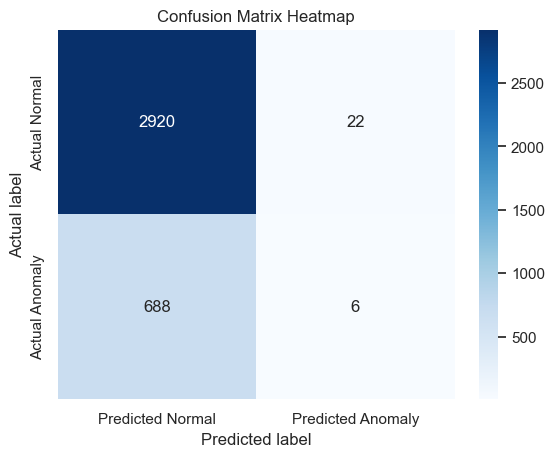

In [136]:
import seaborn as sns

# Assuming tn, fp, fn, tp are defined and represent true negatives, false positives, false negatives, and true positives respectively
conf_matrix = [[tn, fp], [fn, tp]]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Anomaly'], yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


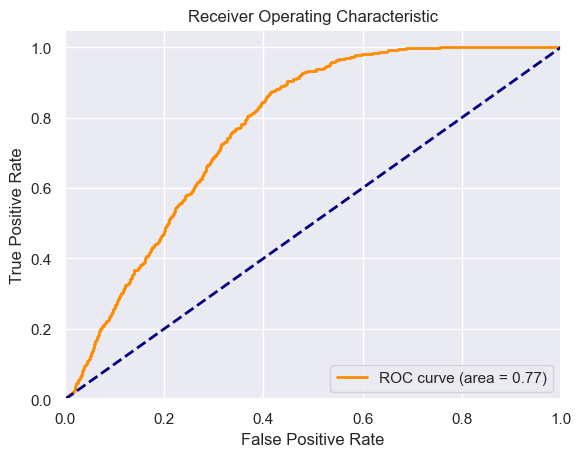

In [137]:
# Use the decision_function to obtain anomaly scores
# Note: Higher scores indicate more normal, lower scores indicate more anomalous
anomaly_scores = best_model.decision_function(X_test)

# Since ROC curve requires positive class probabilities, you might need to transform these scores
# For Isolation Forest, lower scores are more anomalous, so you can invert the scores to interpret them as "probabilities"
prediction_scores = -anomaly_scores  # Inverting scores; now lower scores (more anomalous) have higher "probabilities"

# Continue with your ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test_simulated, prediction_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


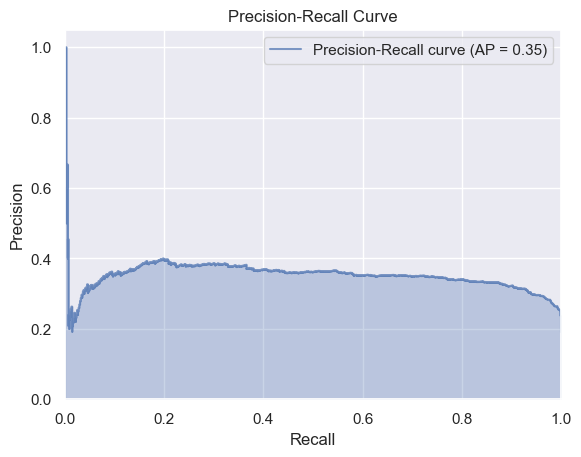

In [138]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_simulated, prediction_scores)
average_precision = average_precision_score(y_test_simulated, prediction_scores)

plt.figure()
plt.step(recall, precision, where='post', color='b', alpha=0.7, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()
